# KNN Assignment
### Created by - Sanjana PAL

## Problem Statement

Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps






## KNN glass Assignment

### Knn is a k-nearest neighbour it is also call as lazy learner,because it does not learn from model it only calculate the distance.knn used for calssification as well as regression,in classification if we want to add a new dataset into the model we calculate mode but in regression we used average or mean.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.metrics import classification_report
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250
warnings.filterwarnings('ignore')
%matplotlib inline

In [77]:
df = pd.read_csv("glass.csv")

In [78]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


- using describe,it shows there no null values are present.

In [6]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

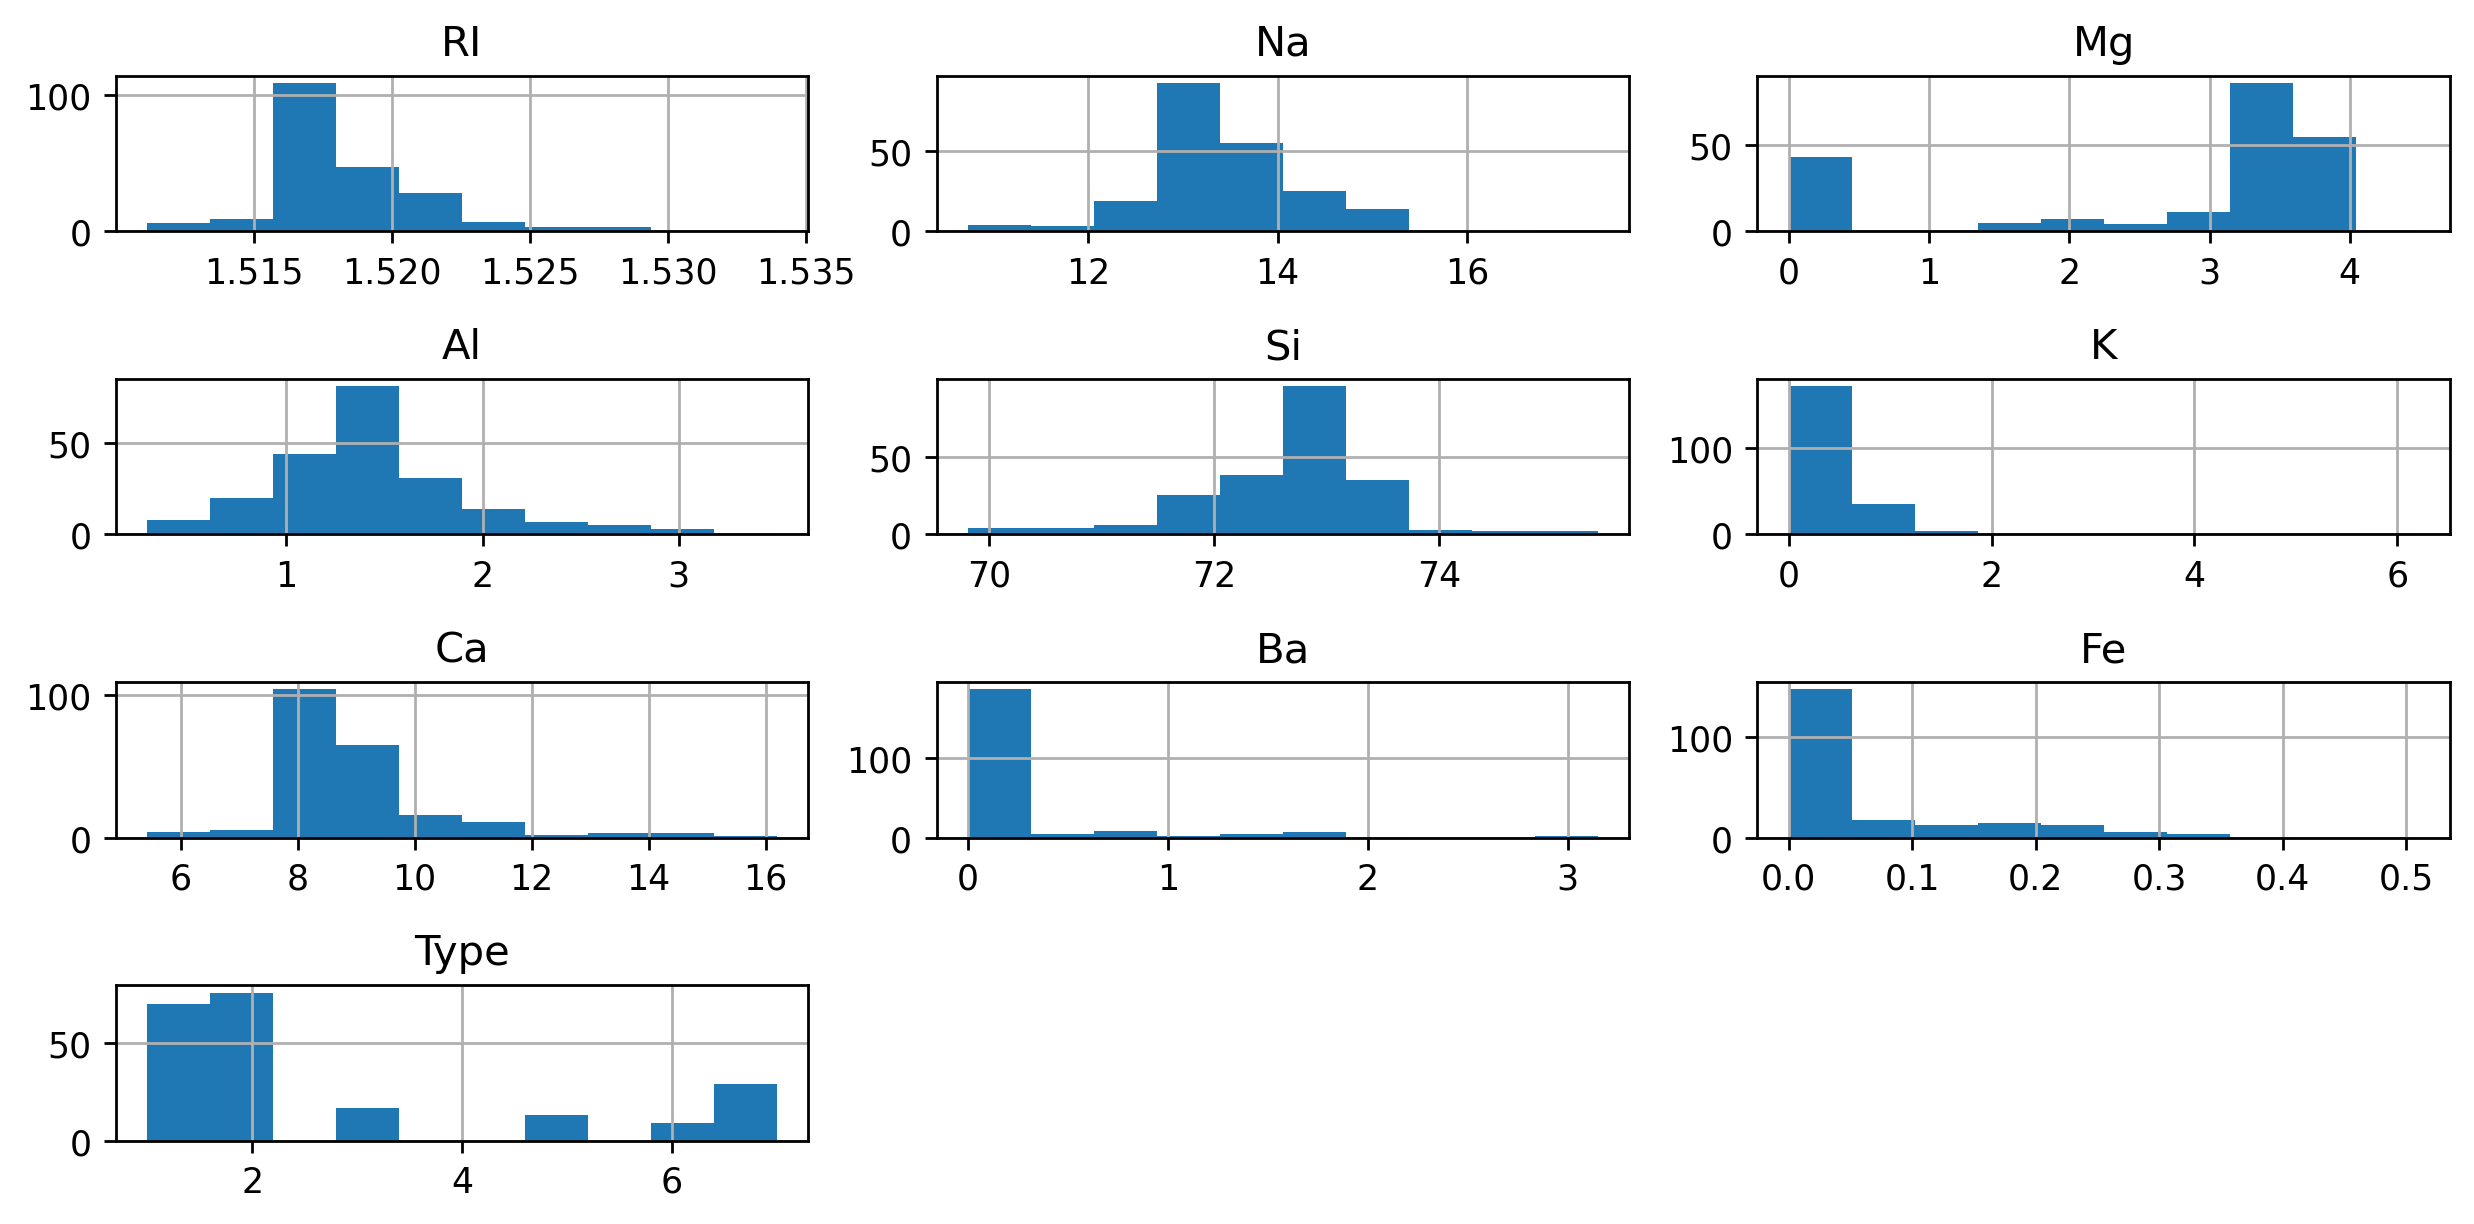

In [79]:
df.hist()
plt.tight_layout()

<AxesSubplot:>

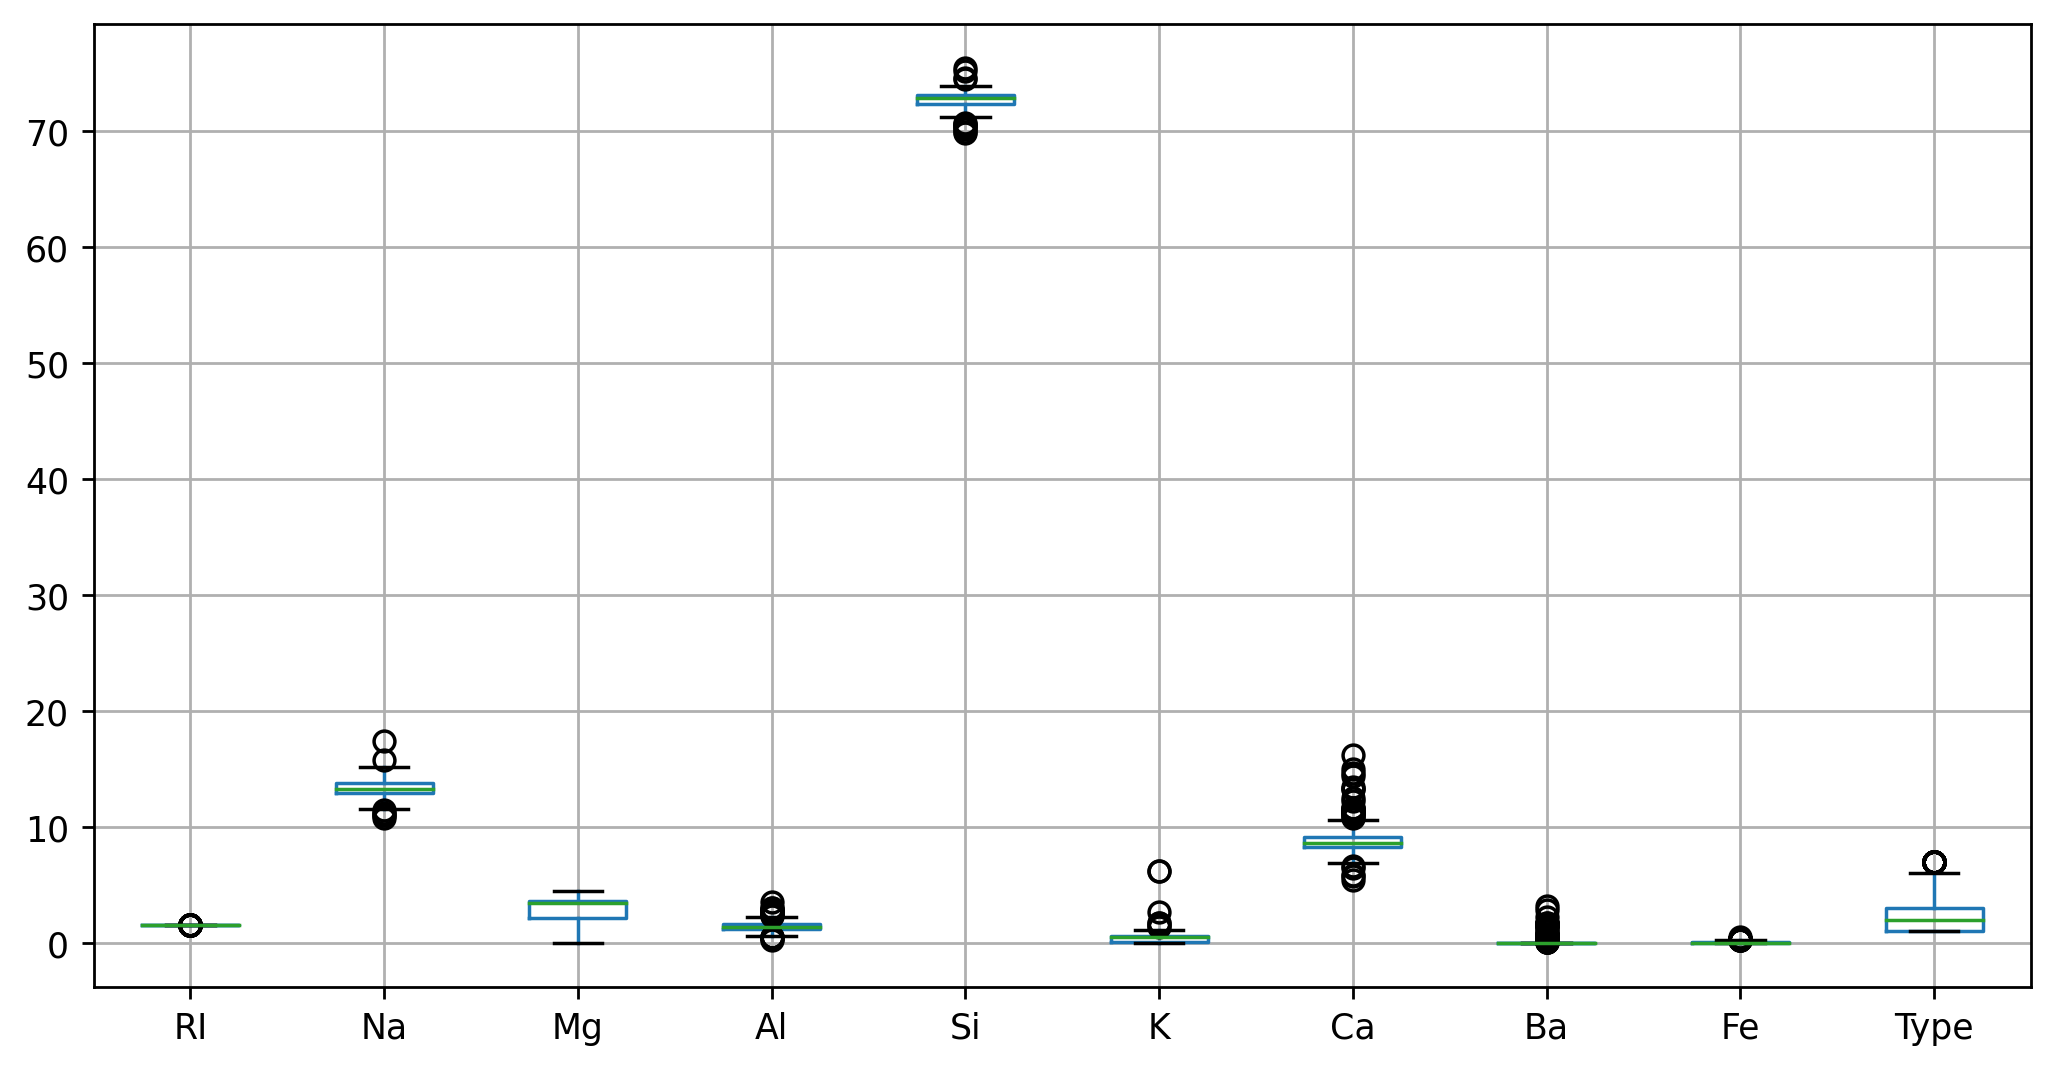

In [80]:
df.boxplot()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


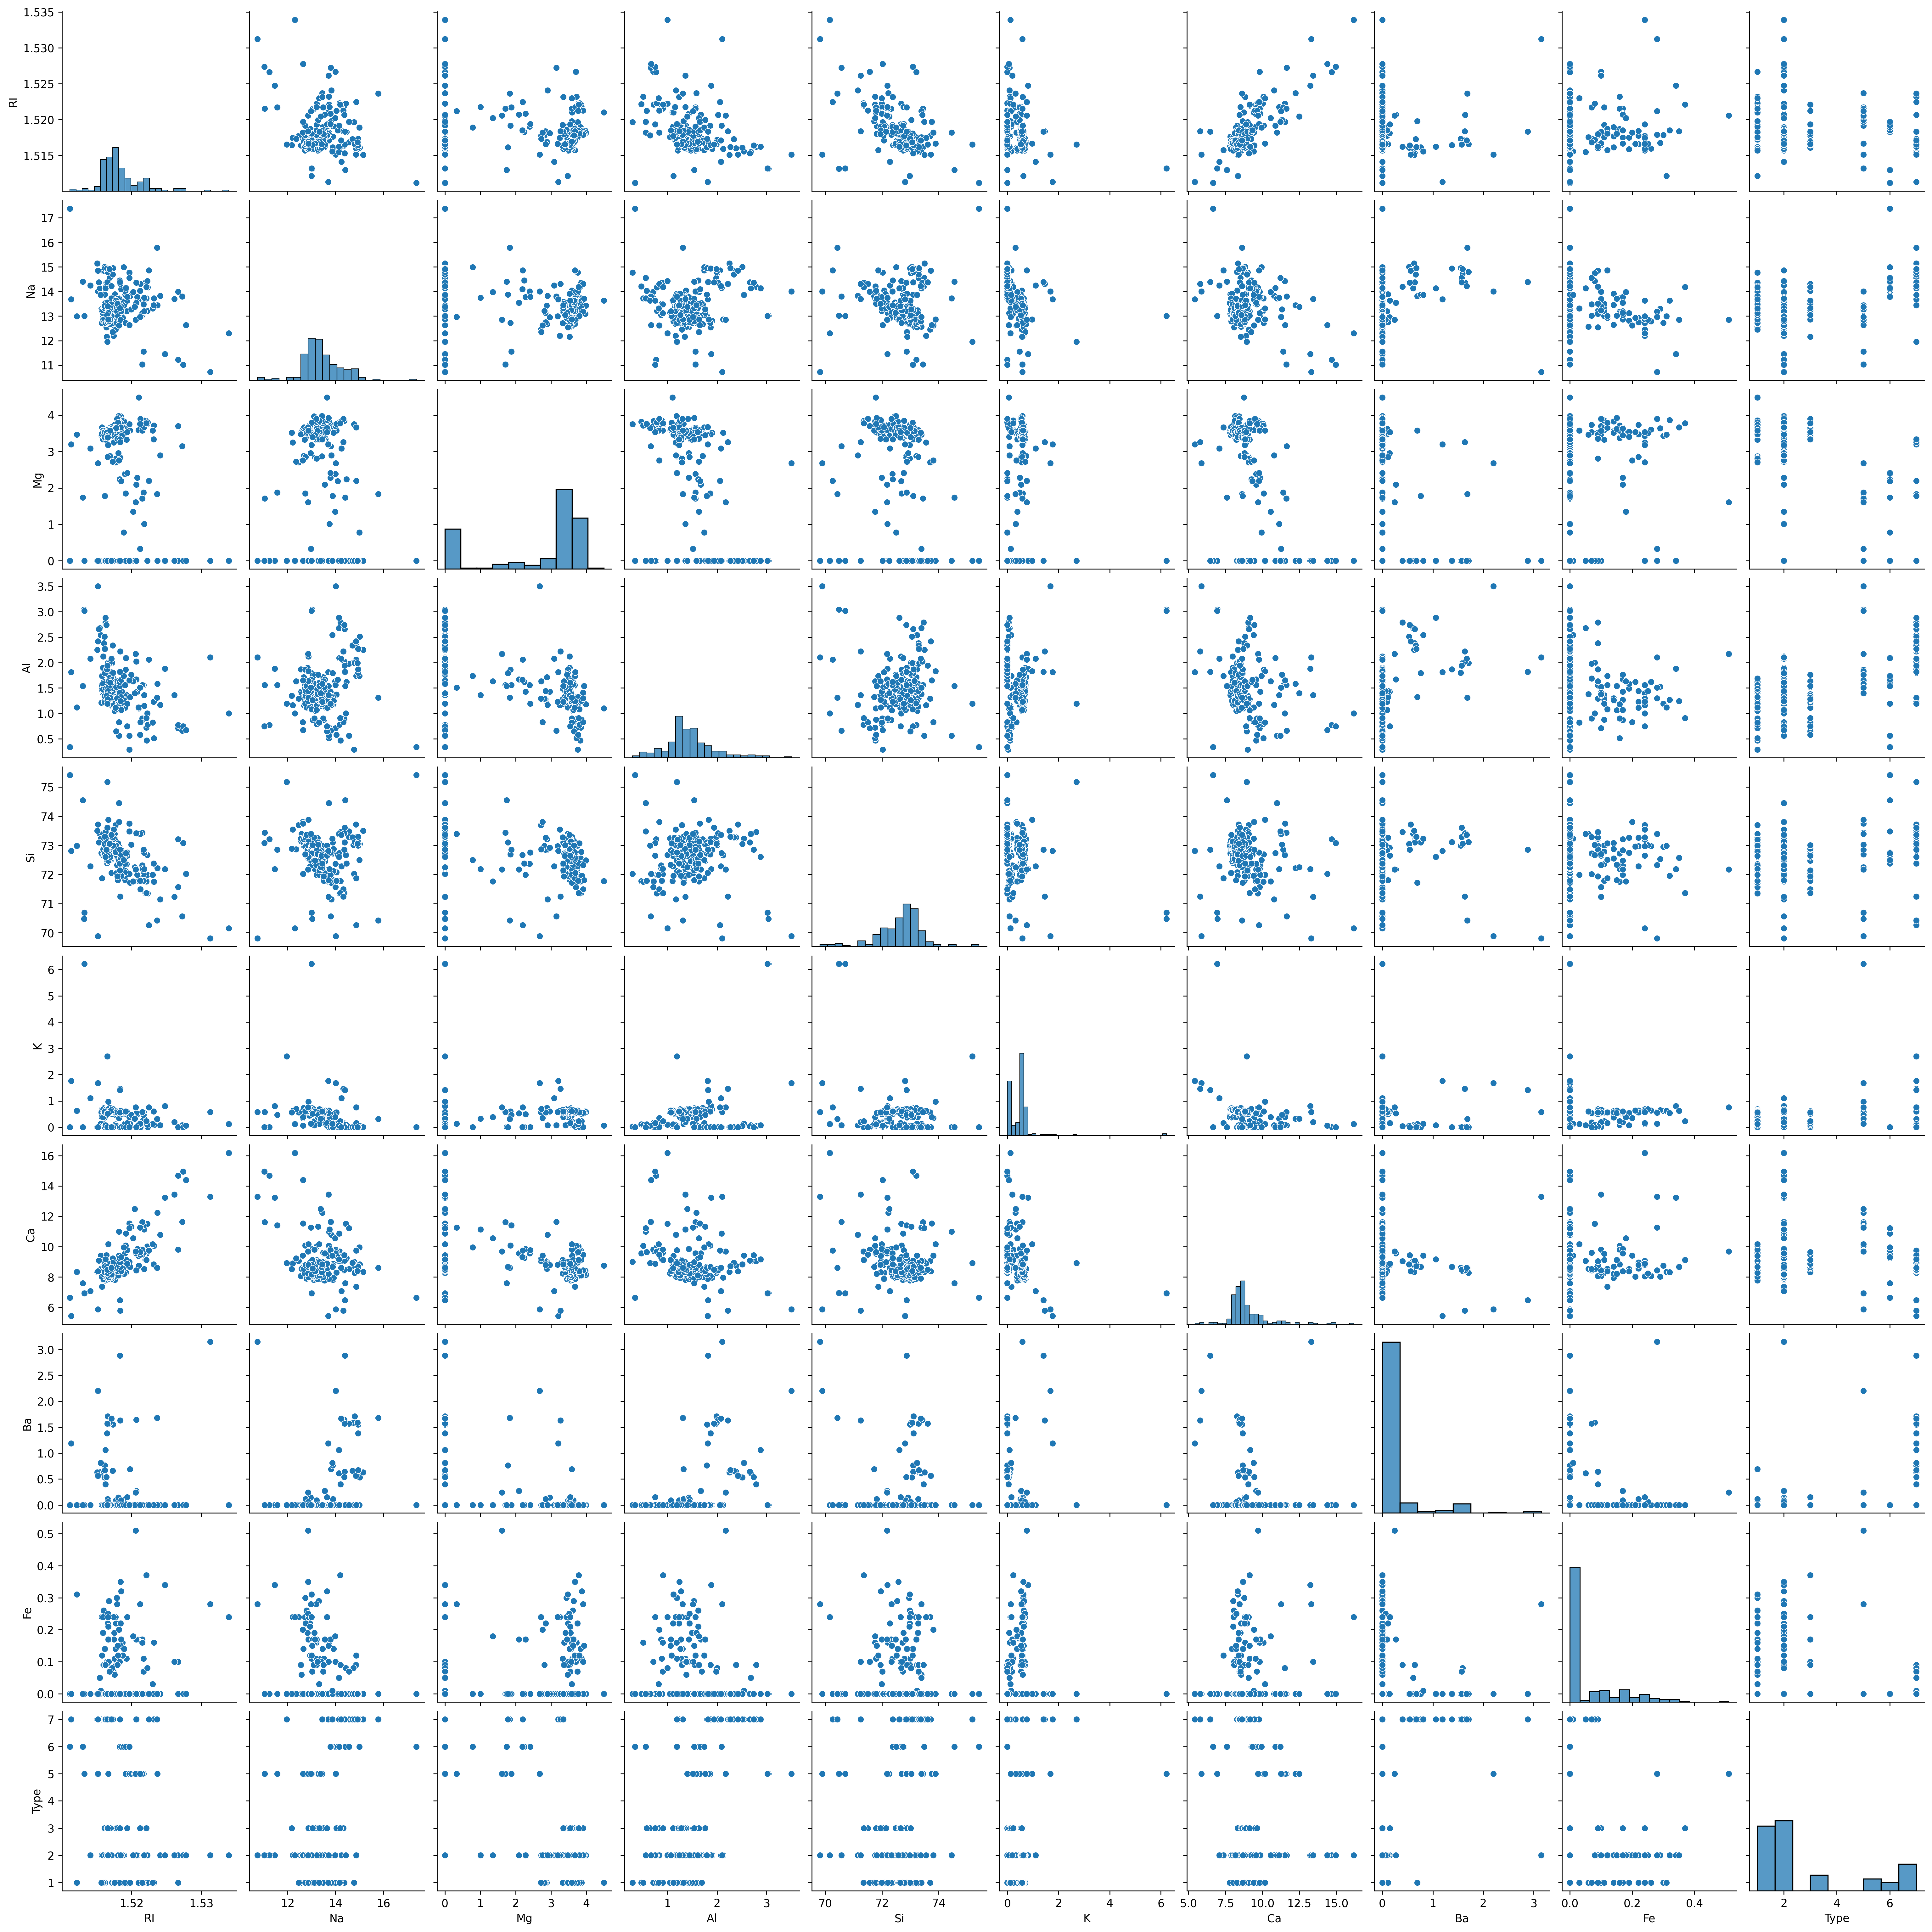

In [81]:
sns.pairplot(df)

### After describing we are going to split the data into training and testing part ,after splitting we standarised the data to remove unbaisednest from data.

# splitting the data

In [21]:
x=df.iloc[:,:-1]
y=df['Type']

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

# Feature Scaling

In [27]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [28]:
x

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

# model building

### we have to develop generalised model which does have underfitting and overfitting.

In [31]:
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

In [32]:
ypred

array([5, 7, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 7,
       2, 1, 1, 1, 2, 2, 1, 1, 5, 6, 1, 1, 1, 2, 1, 1, 5, 1, 1, 7, 7],
      dtype=int64)

In [40]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.67      0.84      0.74        19
           2       0.69      0.75      0.72        12
           3       0.00      0.00      0.00         6
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         4

    accuracy                           0.70        43
   macro avg       0.56      0.60      0.58        43
weighted avg       0.60      0.70      0.65        43



In [70]:
knn.score(xtrain,ytrain),knn.score(xtest,ytest)

(0.6374269005847953, 0.627906976744186)

### we doest not have exact k value,that why we are selecting k =3 and check tmhe accuaracy of the model.

In [41]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

In [42]:
ypred

array([6, 7, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 7,
       2, 1, 1, 1, 2, 2, 2, 1, 5, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 7, 7],
      dtype=int64)

In [43]:
knn.score(xtrain,ytrain),knn.score(xtest,ytest)

(0.8187134502923976, 0.6976744186046512)

### if we are selecting k=3 ,training accuracy is 0.8187134502923976 and testing accuracy 0.6976744186046512.It shows the presence of overfitting in the model.To come up with overfitting we have to find accurate k value and increased the testing accuracy.

In [47]:
trainacc=[]
testacc=[]

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    trainacc.append(knn.score(xtrain,ytrain))
    testacc.append(knn.score(xtest,ytest))

In [48]:
trainacc

[1.0,
 0.8362573099415205,
 0.8187134502923976,
 0.783625730994152,
 0.7485380116959064,
 0.7426900584795322,
 0.7017543859649122,
 0.6900584795321637,
 0.6432748538011696,
 0.6432748538011696,
 0.6374269005847953,
 0.631578947368421,
 0.6374269005847953,
 0.631578947368421,
 0.631578947368421,
 0.6374269005847953,
 0.631578947368421,
 0.631578947368421,
 0.6257309941520468]

In [49]:
testacc

[0.7209302325581395,
 0.6976744186046512,
 0.6976744186046512,
 0.6976744186046512,
 0.7209302325581395,
 0.6744186046511628,
 0.6976744186046512,
 0.6511627906976745,
 0.6046511627906976,
 0.6046511627906976,
 0.5813953488372093,
 0.6046511627906976,
 0.627906976744186,
 0.627906976744186,
 0.627906976744186,
 0.627906976744186,
 0.6511627906976745,
 0.6511627906976745,
 0.6511627906976745]

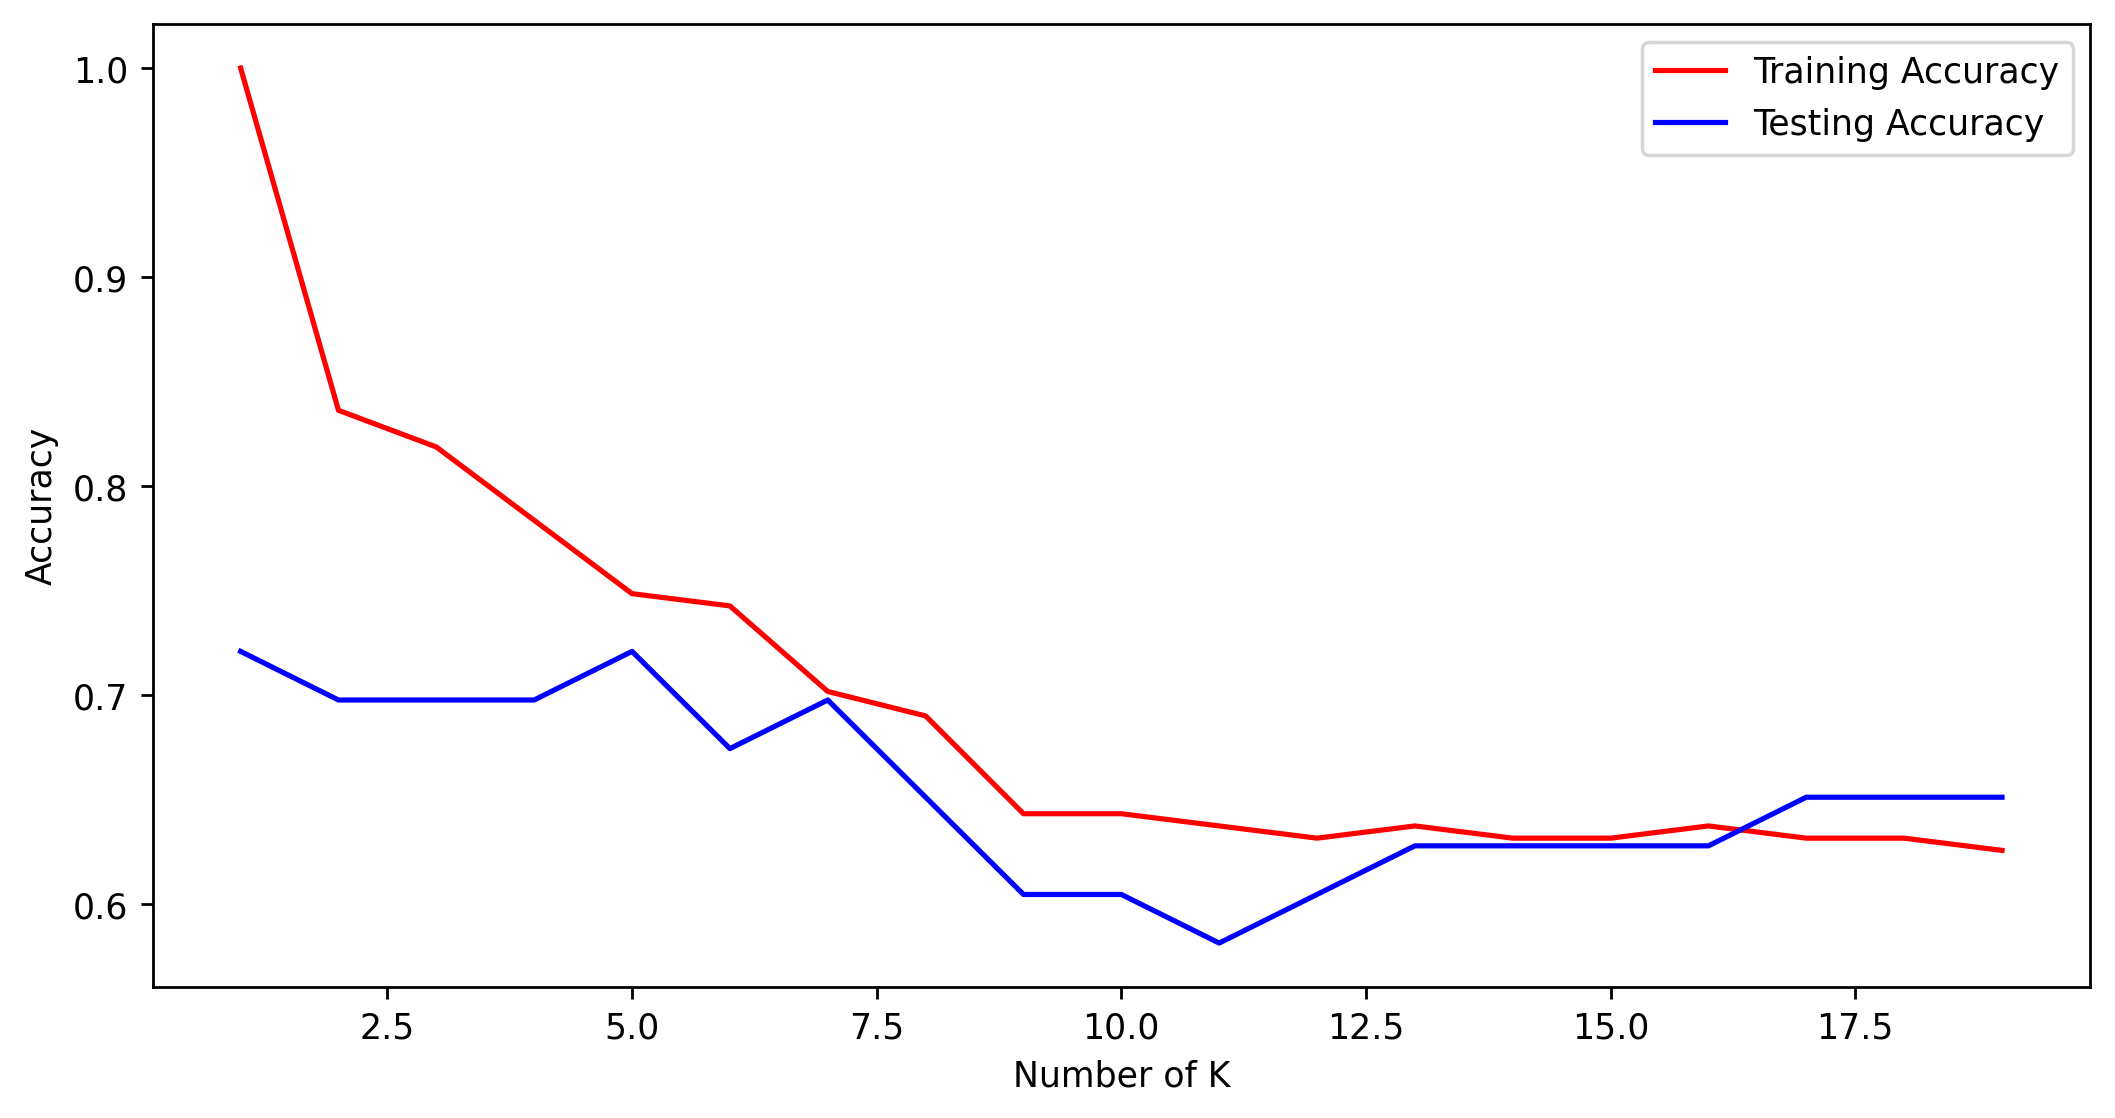

In [60]:
plt.plot(range(1,20),trainacc,label='Training Accuracy',color='red')
plt.plot(range(1,20),testacc,label= 'Testing Accuracy',color = 'blue')
plt.xlabel('Number of K')
plt.ylabel("Accuracy")

plt.legend()

### This figure show intersection at k = 16 , this mean at k =16 training accuracy and testing accuracy will be same ,which can give us a generalised model.

In [62]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

In [68]:
ypred


array([5, 7, 5, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 7,
       2, 1, 2, 1, 2, 2, 2, 1, 5, 7, 1, 1, 1, 2, 2, 2, 5, 1, 1, 7, 7],
      dtype=int64)

In [64]:
knn.score(xtrain,ytrain),knn.score(xtest,ytest)

(0.6374269005847953, 0.627906976744186)

In [69]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.75      0.79      0.77        19
           2       0.50      0.58      0.54        12
           3       0.00      0.00      0.00         6
           5       0.25      1.00      0.40         1
           6       0.00      0.00      0.00         1
           7       0.80      1.00      0.89         4

    accuracy                           0.63        43
   macro avg       0.38      0.56      0.43        43
weighted avg       0.55      0.63      0.58        43

